# AS/RS SIM OPT - Order sequencing problem

## Import

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import sys
import torch
import time
import logging
from pprint import pprint
import json

# Configure logging
logging.basicConfig(level=logging.INFO)

utils_path = os.path.join(os.getcwd(), 'utils')
if utils_path not in sys.path:
    sys.path.append(utils_path)

from MetaSimOpt.opt_algorithms import Fifo, RandomSearch, GeneticAlgorithm, MultiStartSimulatedAnnealing, PartSwarmOpt, ImprovPartSwarmOpt
from MetaSimOpt.handlers import HandlerMetamodel
from MetaSimOpt.utils import plot_opt

c:\Users\ferrari\AppData\Local\pypoetry\Cache\virtualenvs\metasimopt-DMTJvSgP-py3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# set device and current directory

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'
print(f'Device --> {device}')

curr_dir = os.getcwd()

Device --> cuda


## Load data

### Data

In [4]:
dir_data = os.path.join(curr_dir,"1_data","processed","sim_opt")
features_rec = np.load(os.path.join(dir_data,"features_rec.npy"))
features_lin = np.load(os.path.join(dir_data,"features_lin.npy"))
capacities = np.load(os.path.join(dir_data,"features_capacities.npy"))

### Metamodel

In [10]:
rec_cell = "gru" # RNN LSTM GRU
mod_handler = HandlerMetamodel()
dir_metamodel = os.path.join(curr_dir, "2_training_and_testing_results","metamodel_trained",f'{rec_cell}')
file_metamodel = f'metamodel_{rec_cell}.pth'
mod_handler.load_model_from_file(dir_metamodel = dir_metamodel, file_metamodel = file_metamodel)

Found scaler data_scaler.pth


## Single algorithms

In [11]:
order_set = 2

features_rec_instance = features_rec[np.newaxis,order_set]
features_lin_instance = features_lin[np.newaxis,order_set]
print(features_rec_instance.shape)
print(features_lin_instance.shape)
mod_handler.load_data(data=[features_rec_instance, features_lin_instance])
count_zeros_rows = np.sum(np.all(features_rec_instance == 0, axis=2))
solution_length = features_rec_instance.shape[1] - count_zeros_rows
rack_capacity = capacities[order_set]
print(f"Instance with {solution_length} orders - {rack_capacity} %")


(1, 50, 6)
(1, 40)
Instance with 50 orders - 0.5 %


### FIFO

Problem solved in 0.00 s
Sequence: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Best fitness: 5477.97


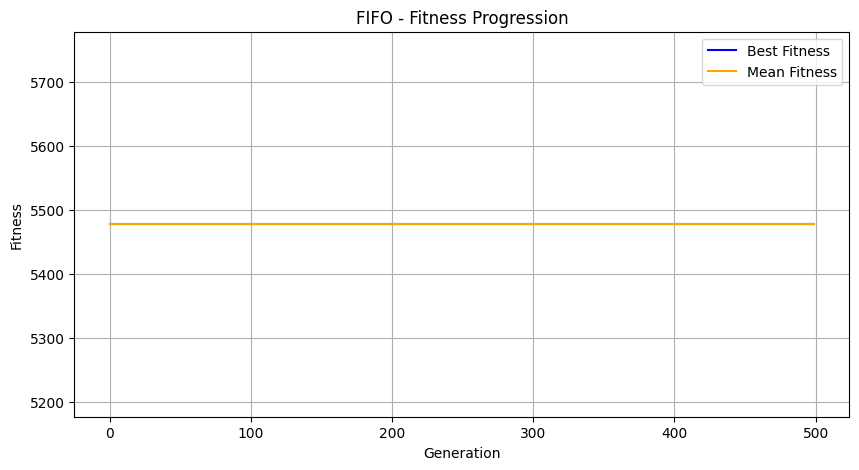

In [12]:
hyper_fifo = {
    'n_iterations' : 500,
    'mod_handler' : mod_handler,
    'early_stop' : 1
}

fifo_instance = Fifo(hyper_fifo)

init_time = time.time()
best_solution, best_fitness = fifo_instance.run()
end_time = time.time()

best_fitness_per_iteration = fifo_instance.best_fitness_per_iteration
all_fitness_per_iteration = fifo_instance.all_fitness_per_iteration

print(f"Problem solved in {(end_time - init_time):.2f} s")
print(f"Sequence: {best_solution}")
print(f"Best fitness: {float(best_fitness):.2f}")
plot_opt(best_fitness_per_iteration,all_fitness_per_iteration, algorithm = "FIFO", plot_prog = True, plot_var = False)

### Random search

Iteration 1 | Best fitness: 5286.87 | No improvement: 0
Iteration 2 | Best fitness: 5286.87 | No improvement: 1
Iteration 3 | Best fitness: 5286.87 | No improvement: 2
Iteration 4 | Best fitness: 5259.24 | No improvement: 0
Iteration 5 | Best fitness: 5259.24 | No improvement: 1
Iteration 6 | Best fitness: 5259.24 | No improvement: 2
Iteration 7 | Best fitness: 5259.24 | No improvement: 3
Iteration 8 | Best fitness: 5242.54 | No improvement: 0
Iteration 9 | Best fitness: 5242.54 | No improvement: 1
Iteration 10 | Best fitness: 5242.54 | No improvement: 2
Iteration 11 | Best fitness: 5242.54 | No improvement: 3
Iteration 12 | Best fitness: 5236.47 | No improvement: 0
Iteration 13 | Best fitness: 5236.47 | No improvement: 1
Iteration 14 | Best fitness: 5236.47 | No improvement: 2
Iteration 15 | Best fitness: 5236.47 | No improvement: 3
Iteration 16 | Best fitness: 5236.47 | No improvement: 4
Iteration 17 | Best fitness: 5236.47 | No improvement: 5
Iteration 18 | Best fitness: 5236.47 | N

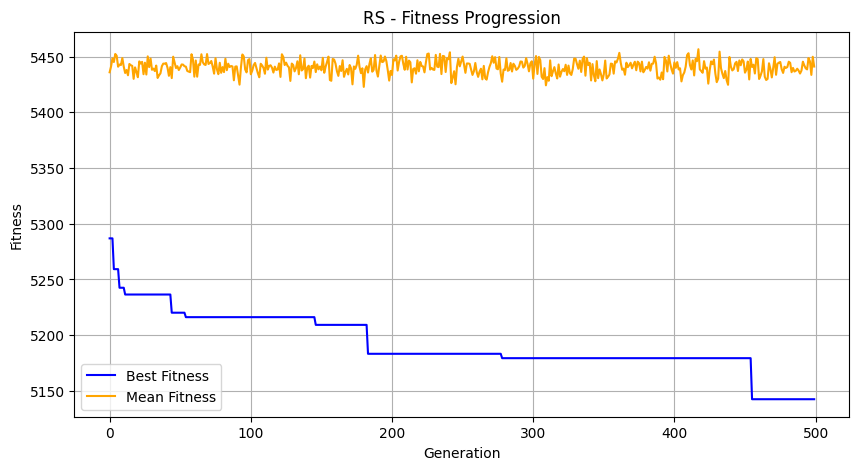

In [13]:
hyper_random = {
    'population_size' : 100,
    'n_iterations' : 500,
    'mod_handler' : mod_handler,
    'early_stop' : 1
}

rs_instance = RandomSearch(hyper_random)

init_time = time.time()
best_solution, best_fitness = rs_instance.run()
end_time = time.time()

best_fitness_per_iteration = rs_instance.best_fitness_per_iteration
all_fitness_per_iteration = rs_instance.all_fitness_per_iteration

print(f"Problem solved in {(end_time - init_time):.2f} s")
print(f"Sequence: {best_solution}")
print(f"Best fitness: {float(best_fitness):.2f}")
plot_opt(best_fitness_per_iteration,all_fitness_per_iteration, algorithm = "RS", plot_prog = True, plot_var = False)

### Genetic algorithm

Iteration 1 | Best fitness: 5275.92 | No improvement: 0
Iteration 2 | Best fitness: 5275.92 | No improvement: 0
Iteration 3 | Best fitness: 5275.92 | No improvement: 1
Iteration 4 | Best fitness: 5243.11 | No improvement: 0
Iteration 5 | Best fitness: 5243.11 | No improvement: 1
Iteration 6 | Best fitness: 5243.11 | No improvement: 2
Iteration 7 | Best fitness: 5243.11 | No improvement: 3
Iteration 8 | Best fitness: 5243.11 | No improvement: 4
Iteration 9 | Best fitness: 5243.11 | No improvement: 5
Iteration 10 | Best fitness: 5243.11 | No improvement: 6
Iteration 11 | Best fitness: 5243.11 | No improvement: 7
Iteration 12 | Best fitness: 5243.11 | No improvement: 8
Iteration 13 | Best fitness: 5243.11 | No improvement: 9
Iteration 14 | Best fitness: 5243.11 | No improvement: 10
Iteration 15 | Best fitness: 5243.11 | No improvement: 11
Iteration 16 | Best fitness: 5243.11 | No improvement: 12
Iteration 17 | Best fitness: 5243.11 | No improvement: 13
Iteration 18 | Best fitness: 5232.39

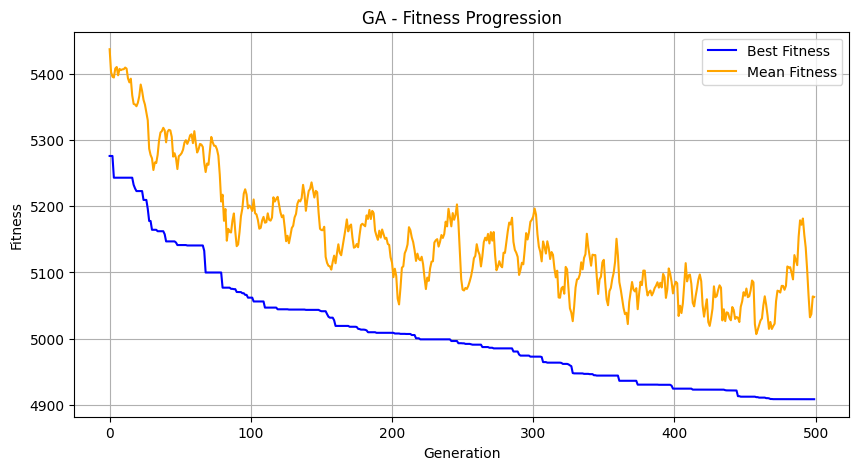

In [30]:
hyper_genetic = {
    'population_size' : 100,
    'n_iterations' : 500,
    'crossover_rate' : 0.8,
    'elite_size' : 5,
    'mutation_rate' : 0.1,
    'selection_method' : 'roulette_wheel',
    'crossover_method' : 'ox',
    'mutation_method' : 'swap',
    'mod_handler' : mod_handler,
    'early_stop' : 1
}

ga_instance = GeneticAlgorithm(hyper_genetic)

init_time = time.time()
best_solution, best_fitness = ga_instance.run(print_prog=True)
end_time = time.time()

best_fitness_per_iteration = ga_instance.best_fitness_per_iteration
all_fitness_per_iteration = ga_instance.all_fitness_per_iteration

print(f"Problem solved in {(end_time - init_time):.2f} s")
print(f"Sequence: {best_solution}")
print(f"Best fitness: {float(best_fitness):.2f}")
plot_opt(best_fitness_per_iteration, all_fitness_per_iteration, algorithm = "GA", plot_prog = True, plot_var = False)

### Multi Start Simulated Annealing

Iteration 1 | Best fitness: 5320.03 | No improvement: 0
Iteration 2 | Best fitness: 5320.03 | No improvement: 1
Iteration 3 | Best fitness: 5320.03 | No improvement: 2
Iteration 4 | Best fitness: 5320.03 | No improvement: 3
Iteration 5 | Best fitness: 5318.21 | No improvement: 0
Iteration 6 | Best fitness: 5318.21 | No improvement: 1
Iteration 7 | Best fitness: 5318.21 | No improvement: 2
Iteration 8 | Best fitness: 5318.21 | No improvement: 3
Iteration 9 | Best fitness: 5318.21 | No improvement: 4
Iteration 10 | Best fitness: 5318.21 | No improvement: 5
Iteration 11 | Best fitness: 5318.21 | No improvement: 6
Iteration 12 | Best fitness: 5318.21 | No improvement: 7
Iteration 13 | Best fitness: 5316.36 | No improvement: 0
Iteration 14 | Best fitness: 5316.36 | No improvement: 1
Iteration 15 | Best fitness: 5316.36 | No improvement: 2
Iteration 16 | Best fitness: 5316.36 | No improvement: 3
Iteration 17 | Best fitness: 5316.36 | No improvement: 4
Iteration 18 | Best fitness: 5316.36 | N

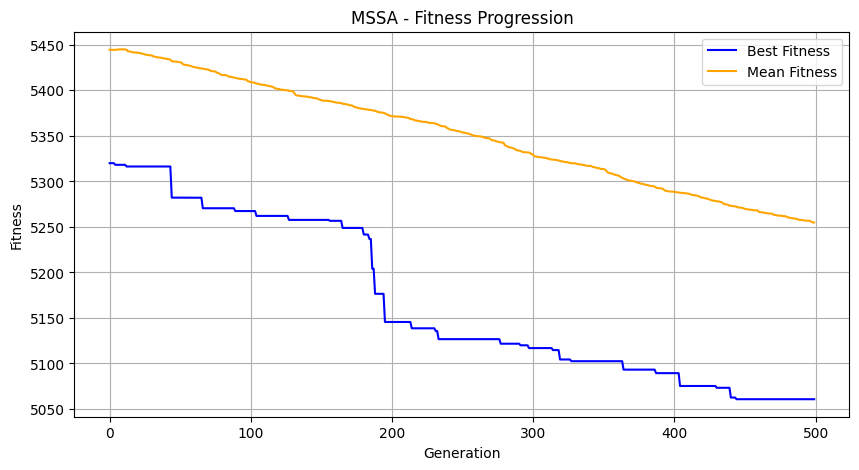

In [16]:
hyper_mssa = {
    'population_size' : 100,
    'n_iterations' : 500,
    'temperature' : 50,
    'cooling_rate' : 0.9,
    'mutation_rate' : 0.1,
    'mutation_method' : 'swap',
    'mod_handler' : mod_handler,
    'early_stop' : 1
}

mssa_instance = MultiStartSimulatedAnnealing(hyper_mssa)

init_time = time.time()
best_solution, best_fitness = mssa_instance.run()
end_time = time.time()

best_fitness_per_iteration = mssa_instance.best_fitness_per_iteration
all_fitness_per_iteration = mssa_instance.all_fitness_per_iteration

print(f"Problem solved in {(end_time - init_time):.2f} s")
print(f"Sequence: {best_solution}")
print(f"Best fitness: {float(best_fitness):.2f}")
plot_opt(best_fitness_per_iteration,all_fitness_per_iteration, algorithm = "MSSA", plot_prog = True, plot_var = False)

### Particle swarm optimisation

Iteration 1 | Best fitness: 5314.11 | No improvement: 0
Iteration 2 | Best fitness: 5314.11 | No improvement: 1
Iteration 3 | Best fitness: 5314.11 | No improvement: 2
Iteration 4 | Best fitness: 5314.11 | No improvement: 3
Iteration 5 | Best fitness: 5314.11 | No improvement: 4
Iteration 6 | Best fitness: 5297.36 | No improvement: 0
Iteration 7 | Best fitness: 5297.36 | No improvement: 1
Iteration 8 | Best fitness: 5297.36 | No improvement: 2
Iteration 9 | Best fitness: 5297.36 | No improvement: 3
Iteration 10 | Best fitness: 5297.36 | No improvement: 4
Iteration 11 | Best fitness: 5297.36 | No improvement: 5
Iteration 12 | Best fitness: 5297.36 | No improvement: 6
Iteration 13 | Best fitness: 5297.36 | No improvement: 7
Iteration 14 | Best fitness: 5199.63 | No improvement: 0
Iteration 15 | Best fitness: 5199.63 | No improvement: 1
Iteration 16 | Best fitness: 5199.63 | No improvement: 2
Iteration 17 | Best fitness: 5199.63 | No improvement: 3
Iteration 18 | Best fitness: 5199.63 | N

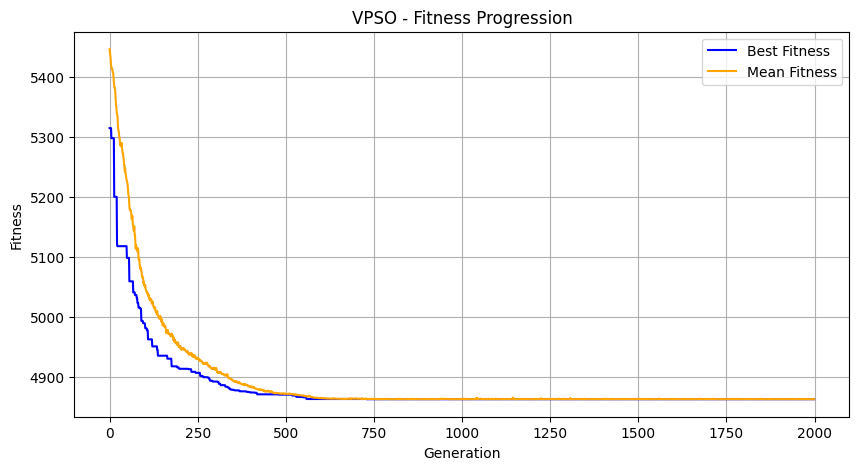

In [28]:
hyper_vpso = {
    'population_size' : 25,
    'n_iterations' : 2000,
    'w' : 0.25,
    'c1' : 0.75,
    'c2' : 0.1,
    'mod_handler' : mod_handler,
    'early_stop' : 1
}

vpso_instance = PartSwarmOpt(hyper_vpso)

init_time = time.time()
best_solution, best_fitness = vpso_instance.run()
end_time = time.time()

best_fitness_per_iteration = vpso_instance.best_fitness_per_iteration
all_fitness_per_iteration = vpso_instance.all_fitness_per_iteration

print(f"Problem solved in {(end_time - init_time):.2f} s")
print(f"Sequence: {best_solution}")
print(f"Best fitness: {float(best_fitness):.2f}")
plot_opt(best_fitness_per_iteration,all_fitness_per_iteration, algorithm = "VPSO", plot_prog = True, plot_var = False)

### Improved particle swarm optimisation

Iteration 1 | Best fitness: 5278.15 | No improvement: 0
Iteration 2 | Best fitness: 5257.64 | No improvement: 0
Iteration 3 | Best fitness: 5257.64 | No improvement: 1
Iteration 4 | Best fitness: 5257.64 | No improvement: 2
Iteration 5 | Best fitness: 5257.17 | No improvement: 0
Iteration 6 | Best fitness: 5238.92 | No improvement: 0
Iteration 7 | Best fitness: 5238.92 | No improvement: 1
Iteration 8 | Best fitness: 5238.92 | No improvement: 2
Iteration 9 | Best fitness: 5238.92 | No improvement: 3
Iteration 10 | Best fitness: 5238.92 | No improvement: 4
Iteration 11 | Best fitness: 5238.92 | No improvement: 5
Iteration 12 | Best fitness: 5238.92 | No improvement: 6
Iteration 13 | Best fitness: 5230.50 | No improvement: 0
Iteration 14 | Best fitness: 5222.88 | No improvement: 0
Iteration 15 | Best fitness: 5222.88 | No improvement: 1
Iteration 16 | Best fitness: 5222.88 | No improvement: 2
Iteration 17 | Best fitness: 5222.88 | No improvement: 3
Iteration 18 | Best fitness: 5222.88 | N

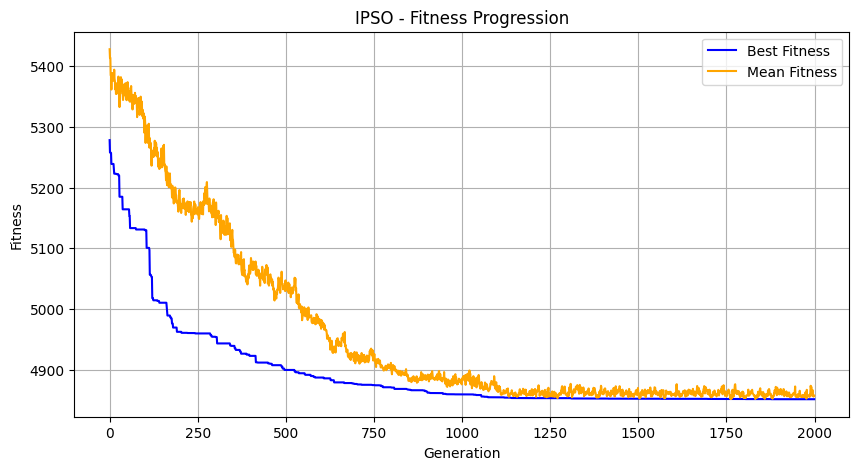

In [29]:
hyper_ipso = {
    'population_size' : 25,
    'n_iterations' : 2000,
    'w' : 0.25,
    'c1' : 0.75,
    'c2' : 0.1,
    'c3' : 0.5,
    'mutation_rate' : 0.1,
    'mutation_method' : 'swap',
    'stag_max' : 20,
    'alpha' : 0.5,
    'beta' : 0.8,
    'mod_handler' : mod_handler,
    'early_stop' : 1
}

ipso_instance = ImprovPartSwarmOpt(hyper_ipso)

init_time = time.time()
best_solution, best_fitness = ipso_instance.run()
end_time = time.time()

best_fitness_per_iteration = ipso_instance.best_fitness_per_iteration
all_fitness_per_iteration = ipso_instance.all_fitness_per_iteration

print(f"Problem solved in {round(end_time - init_time,2)} s")
print(f"Sequence: {best_solution}")
print(f"Best fitness: {round(float(best_fitness),2)}")
plot_opt(best_fitness_per_iteration,all_fitness_per_iteration, algorithm = "IPSO", plot_prog = True, plot_var = False)

## Comparison

### Hyperparameters selection

In [ ]:
N_ITERATIONS = 2000
EARLY_STOP = 1

hyper_fifo = {
    'n_iterations' : N_ITERATIONS,
    'early_stop' : EARLY_STOP
}

hyper_random = {
    'population_size' : 100,
    'n_iterations' : N_ITERATIONS,
    'early_stop' : EARLY_STOP
}

hyper_genetic = {
    'population_size' : 100,
    'n_iterations' : N_ITERATIONS,
    'crossover_rate' : 0.8,
    'elite_size' : 5,
    'mutation_rate' : 0.1,
    'selection_method' : 'roulette_wheel',
    'crossover_method' : 'ox',
    'mutation_method' : 'swap',
    'early_stop' : EARLY_STOP
}

hyper_mssa = {
    'population_size' : 100,
    'n_iterations' : N_ITERATIONS,
    'temperature' : 50,
    'cooling_rate' : 0.9,
    'mutation_rate' : 0.1,
    'mutation_method' : 'swap',
    'early_stop' : EARLY_STOP
}

hyper_vpso = {
    'population_size' : 25,
    'n_iterations' : N_ITERATIONS,
    'w' : 0.25,
    'c1' : 0.75,
    'c2' : 0.1,
    'early_stop' : EARLY_STOP
}

hyper_ipso = {
    'population_size' : 25,
    'n_iterations' : N_ITERATIONS,
    'w' : 0.25,
    'c1' : 0.75,
    'c2' : 0.1,
    'c3' : 0.5,
    'mutation_rate' : 0.1,
    'mutation_method' : 'swap',
    'stag_max' : 20,
    'alpha' : 0.5,
    'beta' : 0.8,
    'early_stop' : EARLY_STOP
}

In [ ]:
def convert_ndarray_to_native(obj):
    if isinstance(obj, dict):
        return {k: convert_ndarray_to_native(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convert_ndarray_to_native(item) for item in obj]
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, (np.float32, np.float64)):
        return float(obj)
    else:
        return obj

### Run comparison

In [ ]:
num_instances = features_rec.shape[0]
n_replications = 50

algs = ["FIFO", "RS", "GA", "MSSA", "CPSO", "IPSO"]
classes_algs = {"FIFO" : Fifo, "RS": RandomSearch, "GA": GeneticAlgorithm, "MSSA": MultiStartSimulatedAnnealing, "CPSO": PartSwarmOpt, "IPSO": ImprovPartSwarmOpt}
hypers_alg = {"FIFO" : hyper_fifo, "RS": hyper_random, "GA": hyper_genetic, "MSSA": hyper_mssa, "CPSO": hyper_vpso, "IPSO": hyper_ipso}

results = {}

save_results = True

for n in range(num_instances):

    features_rec_instance = features_rec[np.newaxis,n]
    features_lin_instance = features_lin[np.newaxis,n]
    mod_handler.set_features(features_rec_instance, features_lin_instance)
    count_zeros_rows = np.sum(np.all(features_rec_instance == 0, axis=2))
    solution_length = features_rec_instance.shape[1] - count_zeros_rows
    rack_capacity = capacities[n]

    print(f"\nOptimisation {n+1}/{num_instances} ({round((n/num_instances)*100,2)} %)")
    print(f"Orders: {solution_length}, Capacity: {rack_capacity}")
    key = f'{solution_length}_{rack_capacity}'

    for alg in algs:

        results[alg] = {
            'time' : [],
            'best_solution' : [],
            'best_fitness' : [],
            'best_fitness_per_iteration' : [],
            'all_fitness_per_iteration' : []
            
        }
        
        print(f'Optimisation with {alg}')

        for j in range(n_replications):
            hypers_alg[alg]['mod_handler'] = mod_handler
            instance = classes_algs[alg](hypers_alg[alg])
            init_time = time.time()
            best_solution, best_fitness = instance.run(print_prog = False)
            end_time = time.time()
            best_fitness_per_iteration = instance.best_fitness_per_iteration
            all_fitness_per_iteration = instance.all_fitness_per_iteration

            results[alg]['time'].append(end_time-init_time)
            results[alg]['best_fitness_per_iteration'].append(best_fitness_per_iteration)
            #results[alg]['all_fitness_per_iteration'].append(all_fitness_per_iteration)
    
    if save_results:
        results = convert_ndarray_to_native(results)
        result_directory = os.path.join(curr_dir,"3_sim_opt_results","raw")
        file_name = os.path.join(result_directory, f"{key}.json")

        with open(file_name, 'w') as f:
            json.dump(results, f, indent=4)